In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
data=pd.read_csv('diamonds_dataset.csv')
#displaying the first 5 rows using the head method
data.head()

,id,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM


In [3]:
data.shape

(119307, 11)

In [4]:
data.columns

Index(['id', 'url', 'shape', 'price', 'carat', 'cut', 'color', 'clarity',
       'report', 'type', 'date_fetched'],
      dtype='object')

In [5]:
data.drop("url",axis=1,inplace=True)

In [6]:
data.columns

Index(['id', 'shape', 'price', 'carat', 'cut', 'color', 'clarity', 'report',
       'type', 'date_fetched'],
      dtype='object')

In [7]:
data.dtypes

id                int64
shape            object
price             int64
carat           float64
cut              object
color            object
clarity          object
report           object
type             object
date_fetched     object
dtype: object

In [8]:
data['date_fetched']=pd.to_datetime(data['date_fetched'])

In [9]:
data['date_fetched'] = data['date_fetched'].dt.strftime('%d-%m-%Y')

In [10]:
data.head()

,id,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,Round,400,0.30,Very Good,J,SI2,GIA,natural,29-11-2020
1,10016334,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,29-11-2020
2,9947216,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,29-11-2020
3,10083437,Round,400,0.30,Ideal,I,SI2,GIA,natural,29-11-2020
4,9946136,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,29-11-2020


In [11]:
data['price']=data['price']*81.993

In [12]:
data.head()

,id,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,Round,32797.2,0.30,Very Good,J,SI2,GIA,natural,29-11-2020
1,10016334,Emerald,32797.2,0.31,Ideal,I,SI1,GIA,natural,29-11-2020
2,9947216,Emerald,32797.2,0.30,Ideal,I,VS2,GIA,natural,29-11-2020
3,10083437,Round,32797.2,0.30,Ideal,I,SI2,GIA,natural,29-11-2020
4,9946136,Emerald,32797.2,0.30,Ideal,I,SI1,GIA,natural,29-11-2020


In [13]:
data.rename(columns={'price':'price(in inr)'},inplace=True)

In [14]:
data.columns

Index(['id', 'shape', 'price(in inr)', 'carat', 'cut', 'color', 'clarity',
       'report', 'type', 'date_fetched'],
      dtype='object')

In [15]:
data.describe()

,id,price(in inr),carat
count,1.193070e+05,1.193070e+05,119307.000000
mean,9.905507e+06,2.694981e+05,0.884169
std,2.373824e+05,7.473412e+05,0.671141
min,4.367730e+05,2.213811e+04,0.250000
25%,9.854352e+06,7.379370e+04,0.400000
50%,9.978096e+06,1.451276e+05,0.700000
75%,1.005433e+07,2.861556e+05,1.100000
max,1.009225e+07,1.105856e+08,15.320000


In [16]:
data.isnull().sum()

id               0
shape            0
price(in inr)    0
carat            0
cut              0
color            0
clarity          0
report           0
type             0
date_fetched     0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data['color'].unique()

array(['J', 'I', 'E', 'F', 'G', 'H', 'D'], dtype=object)

In [19]:
data.loc[data.color=='J','color_detail']='near colorless,slight yellow'
data.loc[data.color=='I','color_detail']='near colorless,noticeable yellow'
data.loc[data.color=='E','color_detail']='virtually colorless'
data.loc[data.color=='F','color_detail']='colorless,minimal amount of color'
data.loc[data.color=='G','color_detail']='colorless,slight trace of color when compared'
data.loc[data.color=='H','color_detail']='colorless,slight tinge of color unless compared'
data.loc[data.color=='D','color_detail']='colorless,rare,pure'

In [20]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS1', 'VS1', 'VVS2', 'IF', 'FL'],
      dtype=object)

In [21]:
data.loc[data.clarity=='SI2','clarity_detail']='Slightly Included Flaws'
data.loc[data.clarity=='SI1','clarity_detail']='Slightly Included Flaws'
data.loc[data.clarity=='VS2','clarity_detail']='Very Slightly Included Flaws'
data.loc[data.clarity=='VS1','clarity_detail']='Very Slightly Included Flaws'
data.loc[data.clarity=='VVS1','clarity_detail']='Very, Very Slightly Included Flaws'
data.loc[data.clarity=='VVS2','clarity_detail']='Very, Very Slightly Included Flaws'
data.loc[data.clarity=='IF','clarity_detail']='Internally Flawless'
data.loc[data.clarity=='FL','clarity_detail']=' Flawless,rare,highly valued'


In [22]:
data.head()

,id,shape,price(in inr),carat,cut,color,clarity,report,type,date_fetched,color_detail,clarity_detail
0,10086429,Round,32797.2,0.30,Very Good,J,SI2,GIA,natural,29-11-2020,"near colorless,slight yellow",Slightly Included Flaws
1,10016334,Emerald,32797.2,0.31,Ideal,I,SI1,GIA,natural,29-11-2020,"near colorless,noticeable yellow",Slightly Included Flaws
2,9947216,Emerald,32797.2,0.30,Ideal,I,VS2,GIA,natural,29-11-2020,"near colorless,noticeable yellow",Very Slightly Included Flaws
3,10083437,Round,32797.2,0.30,Ideal,I,SI2,GIA,natural,29-11-2020,"near colorless,noticeable yellow",Slightly Included Flaws
4,9946136,Emerald,32797.2,0.30,Ideal,I,SI1,GIA,natural,29-11-2020,"near colorless,noticeable yellow",Slightly Included Flaws


In [23]:
diamond_color=data[['color','color_detail']]

In [24]:
diamond_color.drop_duplicates()

,color,color_detail
0,J,"near colorless,slight yellow"
1,I,"near colorless,noticeable yellow"
5,E,virtually colorless
20,F,"colorless,minimal amount of color"
21,G,"colorless,slight trace of color when compared"
45,H,"colorless,slight tinge of color unless compared"
75,D,"colorless,rare,pure"


In [25]:
diamond_clarity=data[['clarity','clarity_detail']]

In [26]:
diamond_clarity.drop_duplicates()

,clarity,clarity_detail
0,SI2,Slightly Included Flaws
1,SI1,Slightly Included Flaws
2,VS2,Very Slightly Included Flaws
9,VVS1,"Very, Very Slightly Included Flaws"
19,VS1,Very Slightly Included Flaws
152,VVS2,"Very, Very Slightly Included Flaws"
310,IF,Internally Flawless
1890,FL,"Flawless,rare,highly valued"


In [27]:
data.columns

Index(['id', 'shape', 'price(in inr)', 'carat', 'cut', 'color', 'clarity',
       'report', 'type', 'date_fetched', 'color_detail', 'clarity_detail'],
      dtype='object')

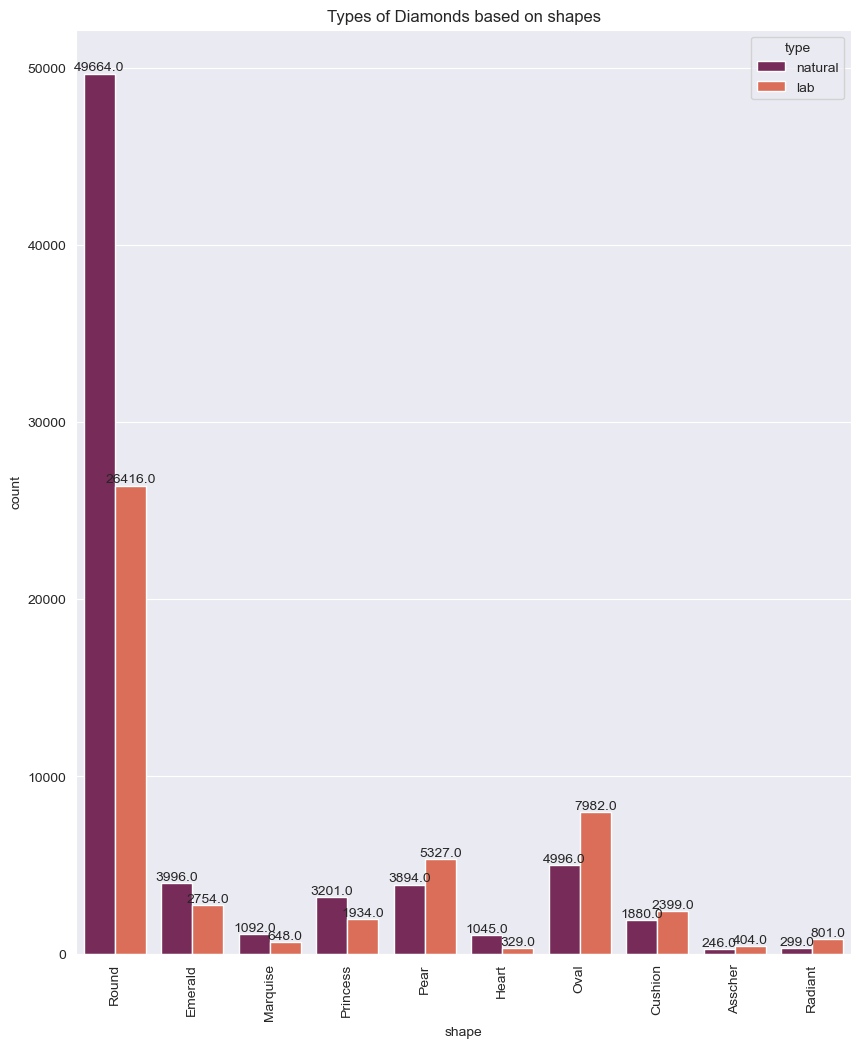

In [30]:
plt.figure(figsize=(10,12))
ax=sns.countplot(x='shape',data=data,hue='type',palette='rocket')
plt.title('Types of Diamonds based on shapes')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom')

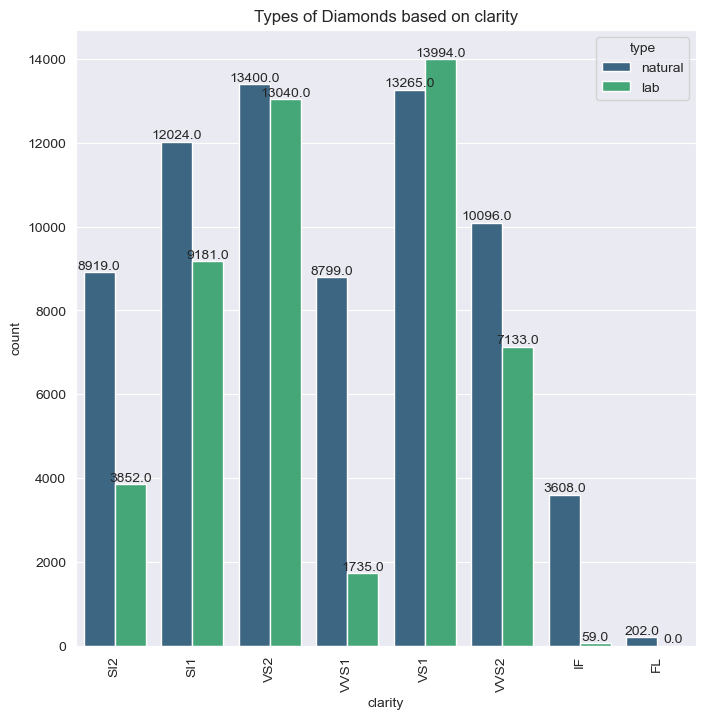

In [29]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='clarity',data=data,hue='type',palette='viridis')
plt.title('Types of Diamonds based on clarity')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom')

Text(0, 0.5, 'Price of Diamonds')

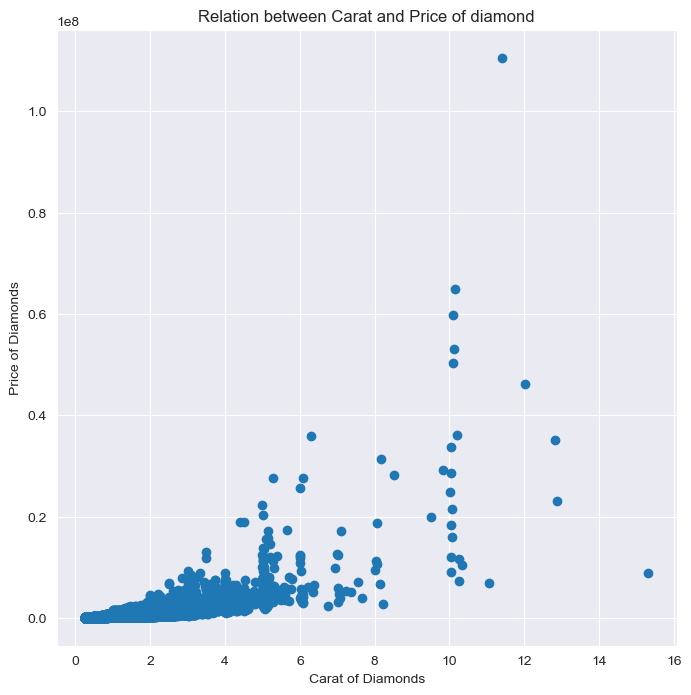

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(x='carat',y='price(in inr)',data=data)
plt.title('Relation between Carat and Price of diamond')
plt.xlabel('Carat of Diamonds')
plt.ylabel('Price of Diamonds')

Text(0, 0.5, 'Price of Diamonds')

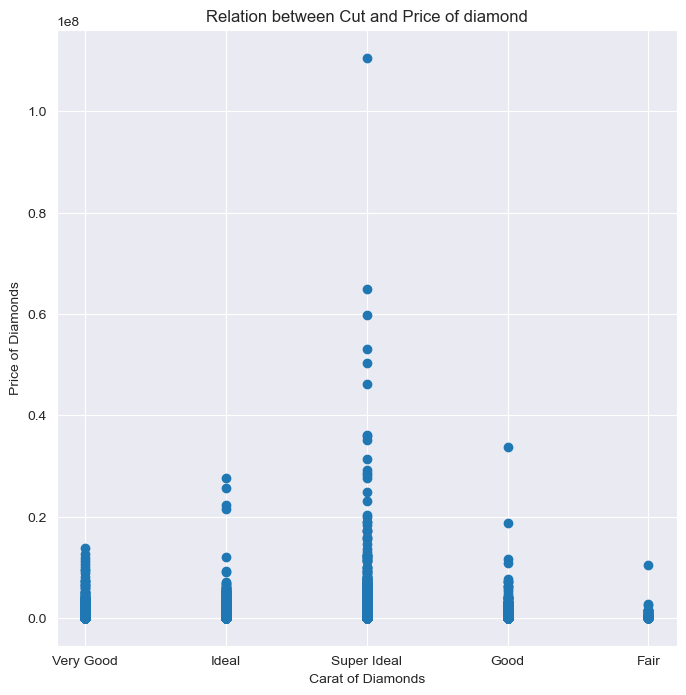

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(x='cut',y='price(in inr)',data=data)
plt.title('Relation between Cut and Price of diamond')
plt.xlabel('Carat of Diamonds')
plt.ylabel('Price of Diamonds')

Text(0, 0.5, 'Price of Diamonds')

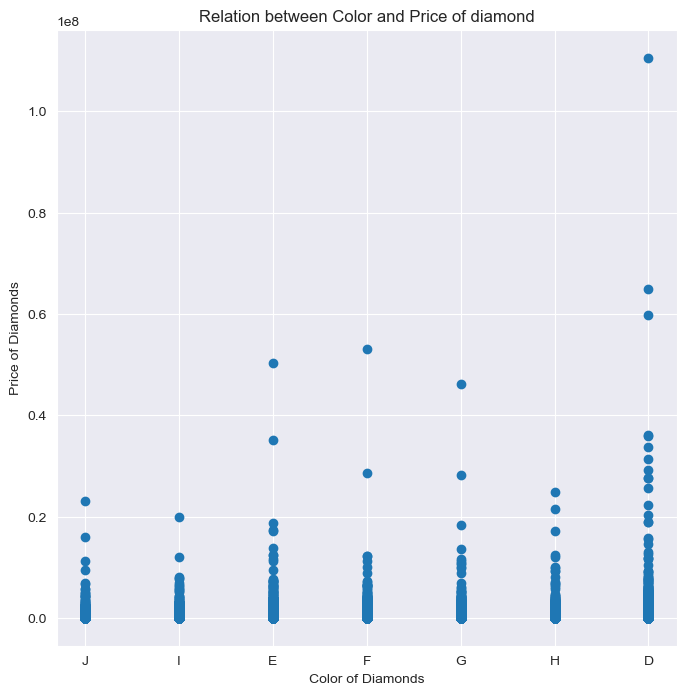

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(x='color',y='price(in inr)',data=data)
plt.title('Relation between Color and Price of diamond')
plt.xlabel('Color of Diamonds')
plt.ylabel('Price of Diamonds')

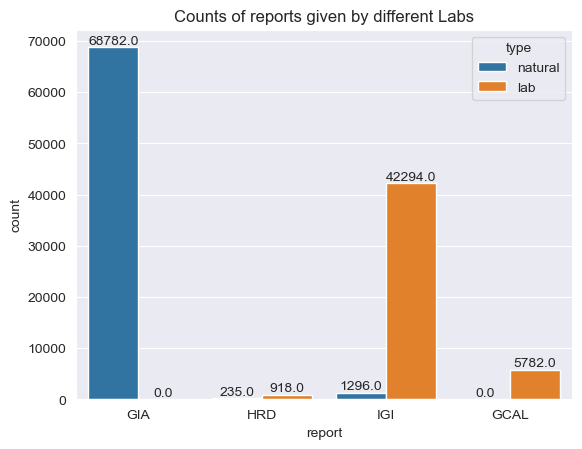

In [34]:
ax=sns.countplot(x='report',data=data,hue='type')
plt.title('Counts of reports given by different Labs')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom')